In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

pi = np.pi

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

# Aufgabe 12: Abtastung von Zufallsprozessen

$X(t)$ sei stationäres mittelwertfreies weißes gaußsches Rauschen der spektralen Leistungsdichte $\frac{N_0}{2}$. Es werde über einen idealen Tiefpass der einseitigen Bandbreite $W$ übertragen.

![Blockdiagramm](figures/A12/System_Blockdiagramm.png)

### AWGN-Zufallsprozess

Zur Vereinfachung wird für das Rauschen in der Nachrichtentechnik häufig ein AWGN-Prozess angenommen. Die Abkürzung bedeutet:
 - **Average-free**: Mittelwertfrei. Hier gilt für $X(t)$ also $\mu_X(t) = \mathrm{E}\left[ X(t) \right] = 0$. Damit liegt auch kein Gleichanteil im Signal vor.
 - **White**: Das Leistungsdichtespektrum ist konstant: $\Phi_{XX}(j\omega) = \frac{N_0}{2}$. Da ein *einfaches* Leistungsdichtespektrum nur für stationäre Zufallsprozesse sinnvoll definierbar ist, muss der Rauschprozess auch stationär sein. Aus einem konstanten Leistungsdichtespektrum folgt direkt eine impulsförmige AKF: 
 
\begin{align}
    \varphi_{XX}(\tau) = \mathcal{F}^{-1}\left\{ \frac{N_0}{2} \right\} = \frac{N_0}{2}\delta(\tau).
\end{align}
 
 Damit sind Werte entlang der Zeitachse für **beliebige** Verschiebungen unkorreliert und die Leistung ist unendlich groß: $\mathrm{E}\left[ X(t)^2 \right] = P_X = \varphi_{XX}(0) = \infty$.
 - **Gaussian**: Die Amplitude des Zufallsprozesses ist für jeden Zeitpunkt normalverteilt.
 - **Noise**: Die Eigenschaften beschreiben ein Störsignal.

Das Leistungsdichtespektrum lässt sich leicht angeben:

#### Leistungsdichtespektrum $\Phi_{XX}(j\omega)$:

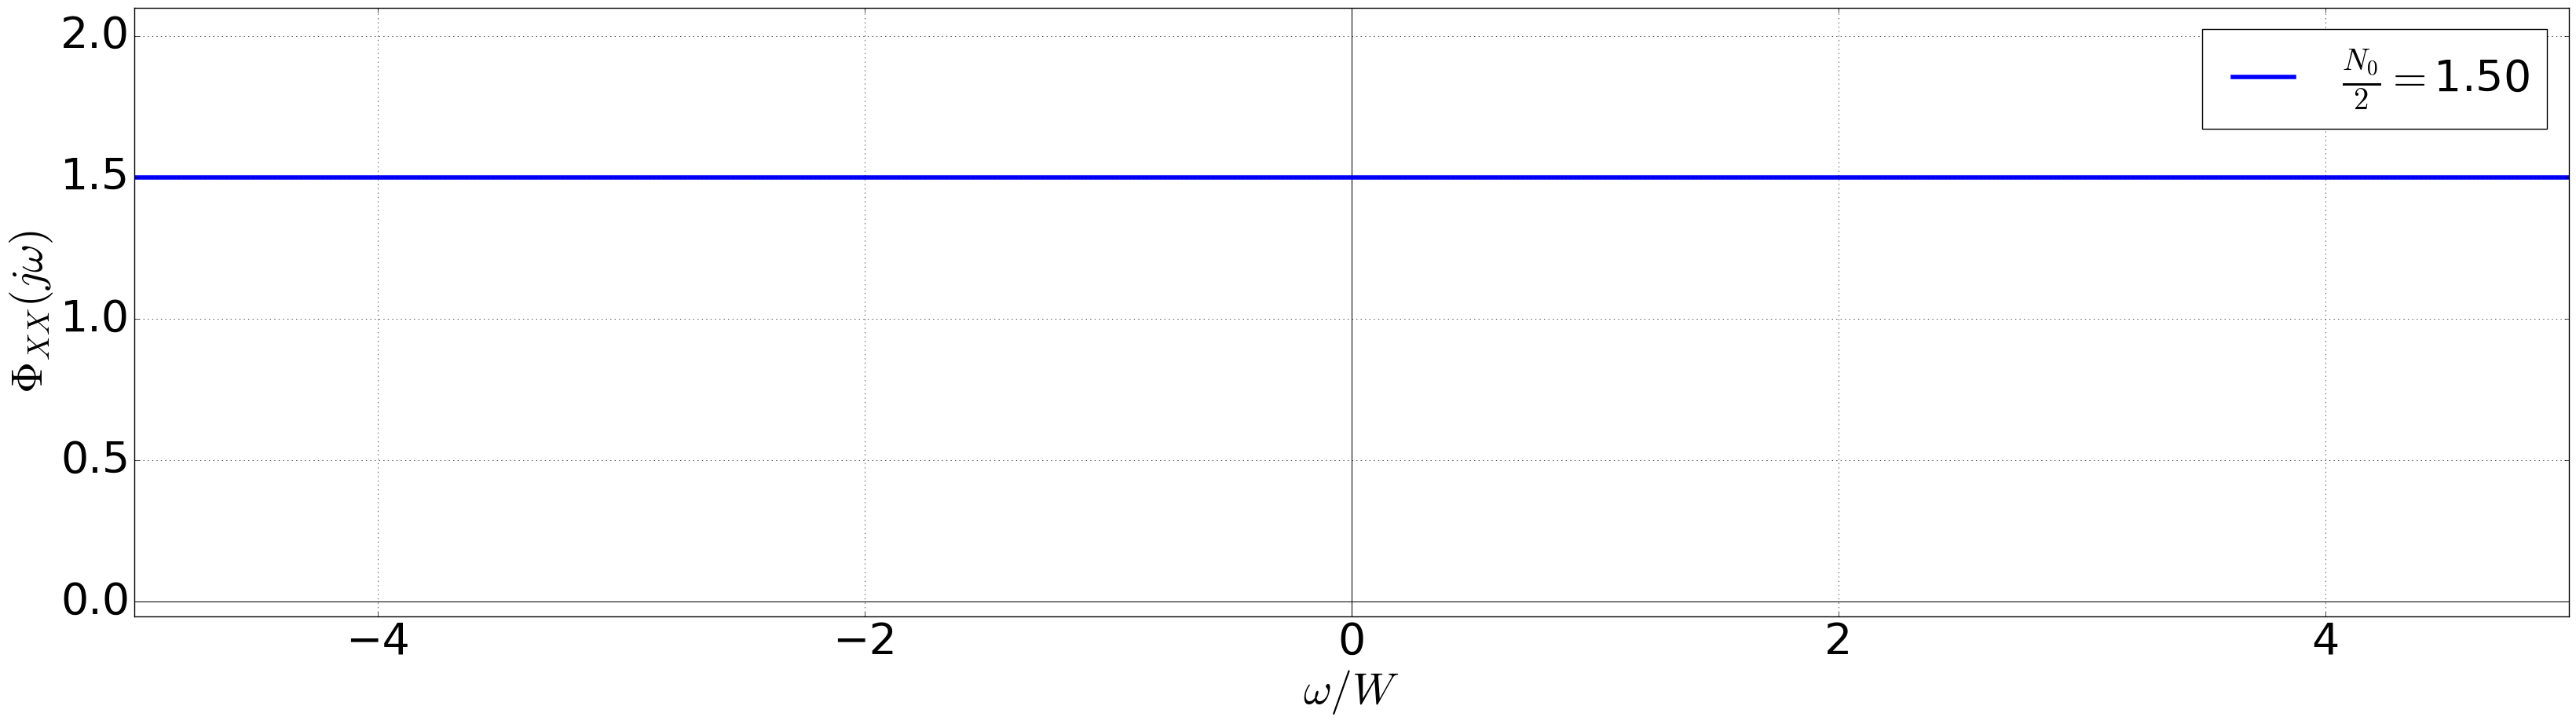

In [2]:
N_0 = 3
omega = np.linspace(-15, 15, 1000)
W = 2
Phi_xx = N_0/2*np.ones_like(omega)

plt.axvline(lw=0.75, c='k')
plt.plot(omega/W, Phi_xx, lw=4, label=r'$\frac{N_0}{2}=$'+'{:2.2f}'.format(N_0/2))
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\omega/W$')
plt.ylabel(r'$\Phi_{XX}(j\omega)$')
plt.xlim((-5, 5))
plt.ylim((-0.05, 1.4*N_0/2))
plt.legend(fontsize=40)
plt.grid(True);

#### Graph der Autokorrelationsfunktion $\varphi_{XX}(\tau) = \frac{N_0}{2}\delta(\tau)$:

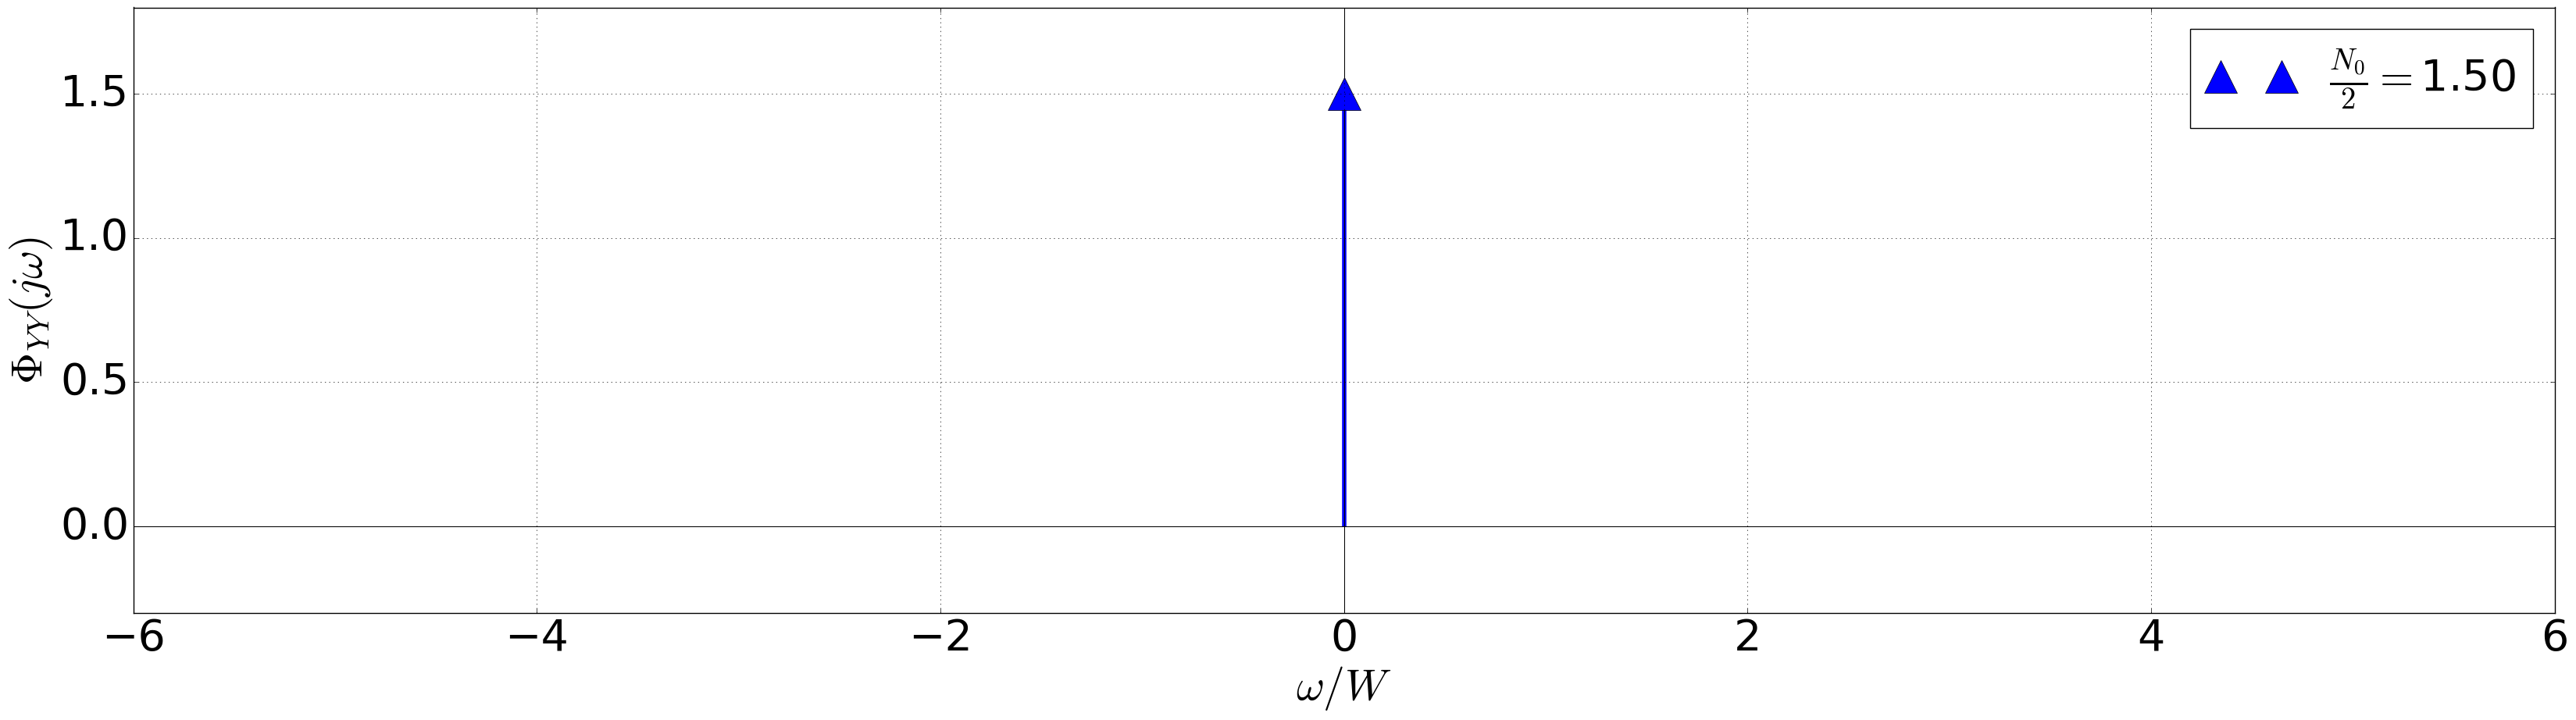

In [3]:
plt.axvline(lw=0.75, c='k')
plt.plot(0, N_0/2, 'b^', ms=30, 
          label=r'$\frac{N_0}{2}=$'+'{:2.2f}'.format(N_0/2))
plt.vlines(0, 0, N_0/2, 'b',lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\omega/W$')
plt.ylabel(r'$\Phi_{YY}(j\omega)$')
plt.xlim((-6, 6))
plt.ylim((-0.3, 1.2*N_0/2))
plt.legend(fontsize=40)
plt.grid(True);

#### Verteilungsdichtefunktion

Die Verteilungsdichtefunktion ist etwas problematisch. Es ist zwar gegeben, dass eine Normalverteilung vorliegt, aber es gilt durch das konstante LDS auch:

\begin{align}
    \mathrm{var}(X(t)) &= \mathrm{E}\left[\left(X(t) - \mu_X(t)\right)^2\right] =\mathrm{E}\left[X(t)^2\right] \\ 
    &= \frac{1}{2\pi} \int_{-\infty}^{\infty}\Phi_{XX}(j\omega)\mathrm{d}\omega  \\
    &= \frac{1}{2\pi} \int_{-\infty}^{\infty}\frac{N_0}{2}\mathrm{d}\omega  \\
    &= \infty.
\end{align}

Damit lässt sich die Verteilunsgdichte nicht einfach angeben. Die Angabe ist dennoch wichtig, denn es ist bekannt, dass beim Durchlaufen eines LTI-Systems wieder ein gaußscher Zufallsprozess resultiert.

## 12.1
Berechnen sie das Leistungsdichtespektrum **und** die Autokorrelationsfunktion des Ausgangsprozesses $Y(t)$. 

Die Aufgabe wird zweckmäßigerweise im Frequenzbereich gelöst.   
Der Ausgangsprozess $Y(t)$ entsteht durch Filterung mit einem idealen Tiefpass der einseitigen Bandbreite $W$. Die Übertragungsfunktion lautet:

\begin{align}
    H(j\omega) = \mathrm{rect}\left( \frac{\omega}{2W}\right)
\end{align}

Das Leistungsdichtespektrum von $Y(t)$ lässt sich durch die Wiener-Lee-Beziehung bestimmen:

\begin{align}
    \Phi_{YY}(j\omega) &= \Phi_{XX}(j\omega) {\cdot} \left| H(j\omega) \right|^2 \\
    &= \frac{N_0}{2} \mathrm{rect} \left( \frac{\omega}{2W} \right)
\end{align}    

#### Graph des Leistungsdichtespektrums $\Phi_{YY}(j\omega)$:

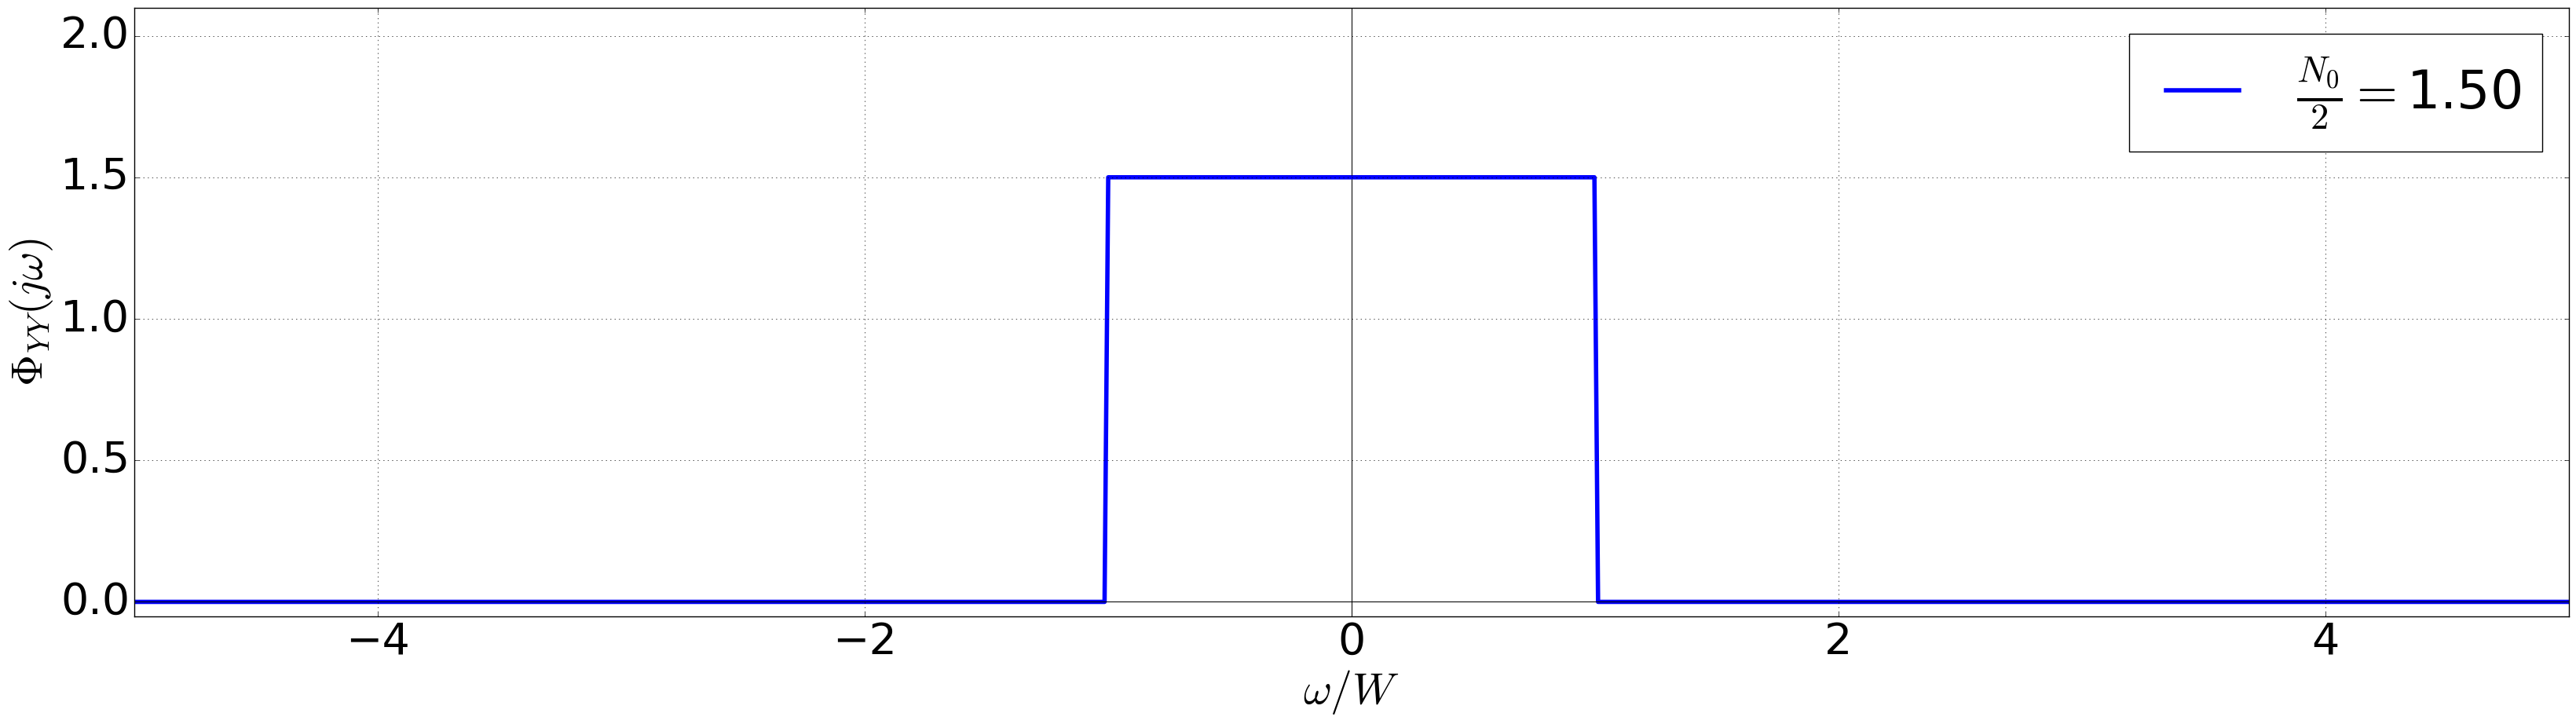

In [4]:
Phi_yy = Phi_xx*(np.abs(omega) < W )

plt.axvline(lw=0.75, c='k')
plt.plot(omega/W, Phi_yy, lw=4, label=r'$\frac{N_0}{2}=$'+'{:2.2f}'.format(N_0/2))
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\omega/W$')
plt.ylabel(r'$\Phi_{YY}(j\omega)$')
plt.xlim((-5, 5))
plt.ylim((-0.05, 1.4*N_0/2))
plt.legend()
plt.grid(True);

Die AKF lässt sich über das Wiener-Khinchine-Theorem berechnen:

\begin{align}
    \varphi_{YY}(\tau) = \mathcal{F}^{-1} \left\{ \Phi_{YY}(j\omega) \right\} = \frac{N_0 W}{2 \pi} \mathrm{si} \left(W\tau\right)
\end{align}

#### Graph der Autokorrelationsfunktion $\varphi_{YY}(\tau)$:

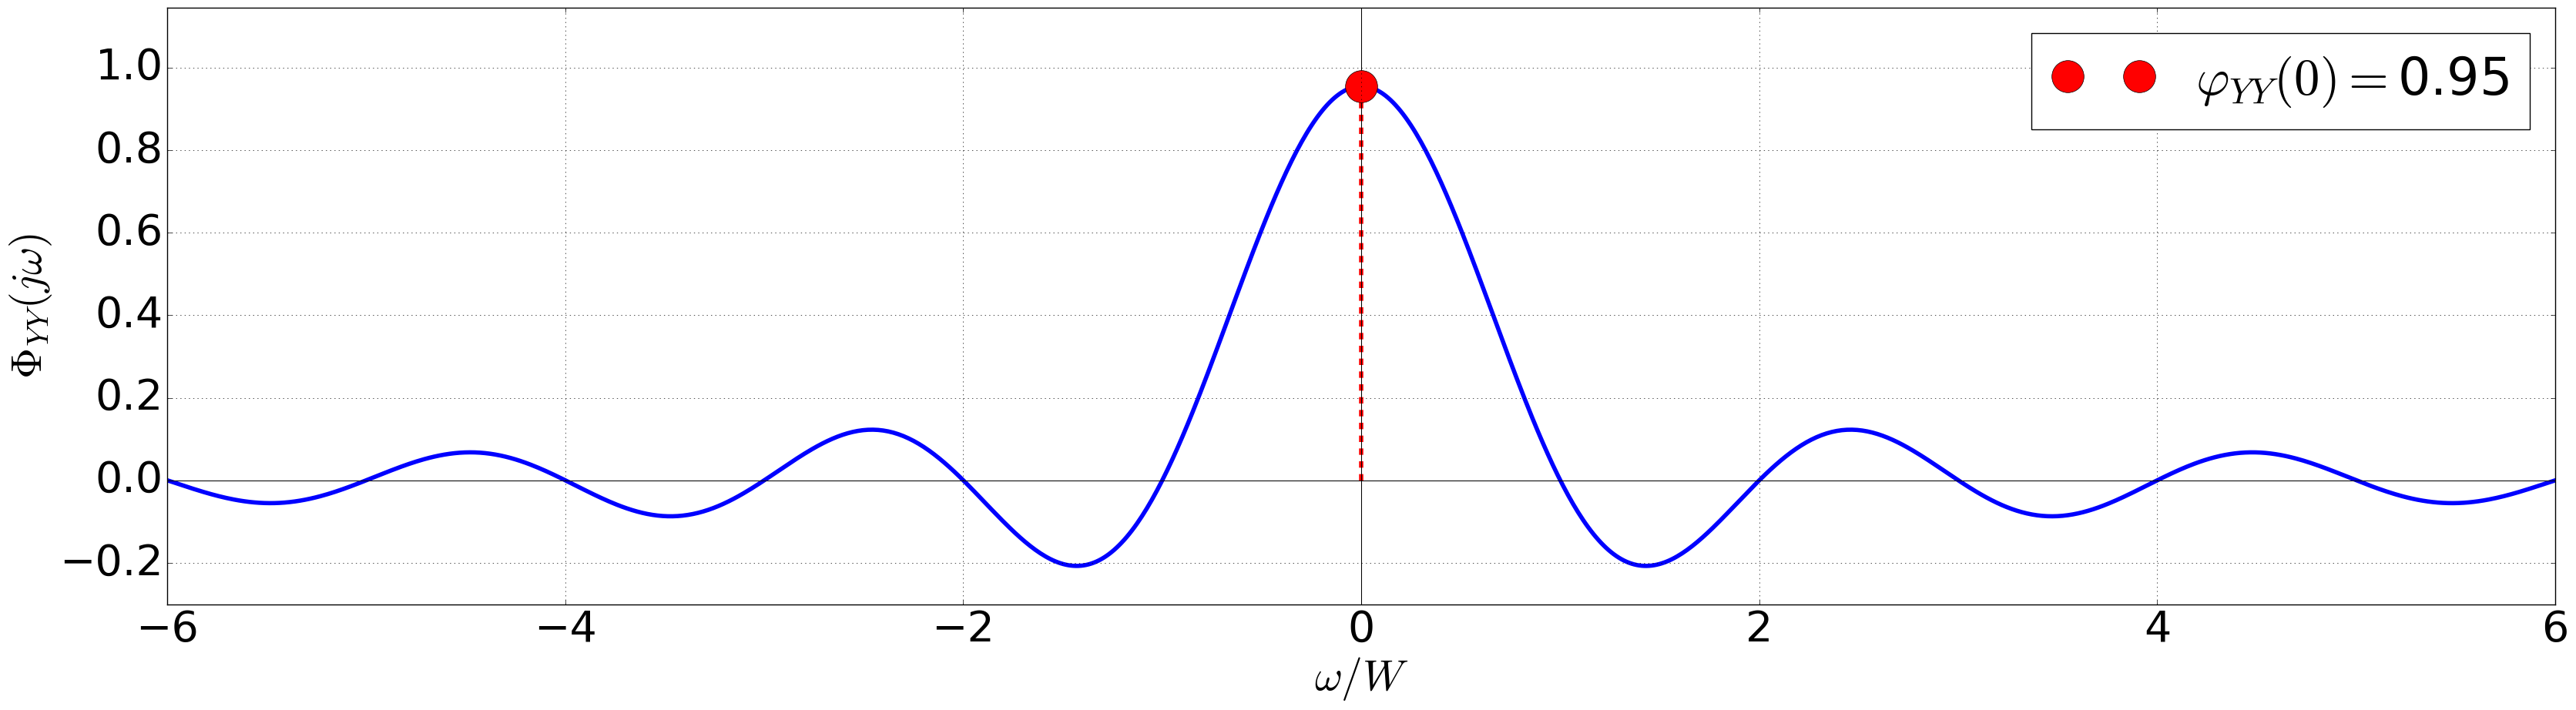

In [5]:
tau = np.linspace(-10, 10, 1000)

power_y = N_0*W/(2*pi)
phi_yy = power_y*np.sinc(W*tau/pi)

plt.axvline(lw=0.75, c='k')
plt.plot(W*tau/pi, phi_yy, lw=4)
plt.axhline(lw=0.75, c='k')

plt.plot(0, power_y, 'ro', ms=30, 
          label=r'$\varphi_{YY}(0)=$'+'{:2.2f}'.format(power_y))
plt.vlines(0, 0, power_y, 'r', 'dashed', lw=4)

plt.xlabel(r'$\omega/W$')
plt.ylabel(r'$\Phi_{YY}(j\omega)$')
plt.xlim((-6, 6))
plt.ylim((-0.3, 1.2*N_0*W/(2*pi)))
plt.legend()
plt.grid(True);

## 12.2
Wie groß ist die Leistung von $X(t)$? Wie groß ist die Leistung von $Y(t)$?

Die (mittlere Momentan-)Leistung ist durch die AKF an der Stelle $\tau=0$ gegeben.   
Wie oben bereits beschrieben hat $X(t)$ deshalb unendliche Leistung:

\begin{align}
    P_X = \mathrm{E}\left[ X(t)^2 \right] = \varphi_{XX}(0) = \frac{N_0}{2}\delta(0) = \infty.
\end{align}

Die Leistung von $Y(t)$ lässt sich genauso berechnen. Zusätzlich wird die Bandbreite auf der Frequenz- (also nicht Kreisfrequenz-) Achse definiert: $B = \frac{W}{2 \pi}$. Damit gilt:

\begin{align}
    P_Y = \mathrm{E}\left[ Y(t)^2 \right] = \varphi_{YY}(0) = N_0 B\ \mathrm{si}(2 \pi B \cdot 0) = N_0 B.
\end{align}

Mit diesem Ergebnis wird auch klar, warum die Leistungsdichte eines AWGN-Prozesses meist als $N_0/2$ angegeben wird: Mit der einseitigen Bandbreite in $\mathrm{Hz}$ lässt sich damit sehr einfach die Leistung des Ausgangsprozesses angeben.

Alternativ lässt sich die Rechnung ebenfalls sehr einfach über das Leistungsdichtespektrum durchführen:

\begin{align}
    P_Y &= \frac{1}{2 \pi} \int_{-\infty}^{\infty} \Phi_{YY}(j\omega) \mathrm{d}\omega = \frac{1}{2 \pi} \frac{N_0}{2} \int_{-W}^{W} 1 \mathrm{d}\omega = \frac{1}{2 \pi} \frac{N_0}{2} \cdot 2W = N_0B.
\end{align}

## 12.3 
Berechnen sie die Verbundverteilungsdichtefunktion der Zufallsvariablen $Y(t)$ und $Y(t+\tau)$, wenn $\tau = \frac{\pi}{W}$.

Für diese Aufgabe lassen sich einige Eigenschaften gaußverteilter Zufallsvariablen und -prozesse ausnutzen:
 - Wird ein Gaußprozess durch ein LTI-System gefiltert, resultiert wieder ein Gaußprozess.
 - Jede Verbundverteilungsdichte eines Gaußprozesses ist wieder eine Gaußverteilung.
 
Damit ist also schon einmal gesichert, dass die Verbundverteilungsdichte eine zweidimensionale Gaußverteilung ist, also mit $\mathbf{y} = (y_1, y_2)^\mathrm{T}$ der Form 

\begin{align}
    p_{Y(t),Y(t+\tau)}(y_1, y_2) =\frac{1}{\sqrt{(2 \pi)^2 \left| \Sigma_\mathbf{YY} \right|}} \mathrm{exp}\left(-\frac{1}{2}\left(\mathbf{y} - \mu_\mathbf{Y}\right)^\mathrm{T}\Sigma_\mathbf{YY}^{-1}\left(\mathbf{y} - \mu_\mathbf{Y}\right)\right)
\end{align}

    folgt.

Die Verteilung ist vollständig bestimmt, wenn $\mu_\mathbf{Y}$ und $\Sigma_\mathbf{YY}$ bekannt sind.

#### 1. Mittelwertvektor:

\begin{align}
    \mu_\mathbf{Y} = \begin{pmatrix} \mu_{Y(t)} \\ \mu_{Y(t+\tau)} \end{pmatrix}
    = \begin{pmatrix} \mathrm{E}\left[Y(t)\right] \\ \mathrm{E}\left[Y(t+\tau)\right] \end{pmatrix} 
    = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
\end{align}

#### 2. Kovarianzmatrix

\begin{align}
    \Sigma_\mathbf{YY} = \begin{pmatrix} \sigma_{Y(t)}^2 & \sigma_{Y(t+\tau)Y(t)} \\ \sigma_{Y(t+\tau)Y(t)} &\sigma_{Y(t+\tau)}^2 \end{pmatrix}
\end{align}

Wegen der Stationarität und der Mittelwertfreiheit gilt:

\begin{align}
    \sigma_{Y(t)}^2 = \mathrm{E}\left[Y(t)^2\right] = \mathrm{E}\left[Y(t+\tau)^2\right] = \varphi_{YY}(0) = N_0 B
\end{align}

Die Nebendiagonalelemente sind ebenfalls identisch. Auch hier kann die Mittelwertfreiheit genutzt werden:

\begin{align}
    \sigma_{Y(t)Y(t+\tau)} = \mathrm{E}\left[Y(t)Y(t+\tau)\right] = \varphi_{YY}(\tau) = N_0 B\ \mathrm{si}(W\tau)
\end{align}

Die AKF hat an der Stelle $\tau = \frac{\pi}{W}$ eine Nullstelle: $\varphi_{YY}\left(\frac{\pi}{W}\right) = 0$. Deswegen sind Werte von $Y(t)$ und $Y(t+\pi/W)$ zueinander **unkorreliert**:

\begin{align}
    \Sigma_\mathbf{YY} = \begin{pmatrix} N_0 B & 0 \\ 0 & N_0 B \end{pmatrix}, \qquad \left|\Sigma_\mathbf{YY}\right| = (N_o B)^2
\end{align}

Wegen der Gaußverteilung sind sie auch **statistisch unabhängig**. Mit den beiden Parametern ergibt sich nämlich:

\begin{align}
    \left(\mathbf{y} - \mu_\mathbf{Y}\right)^\mathrm{T}\Sigma_\mathbf{YY}^{-1}\left(\mathbf{y} - \mu_\mathbf{Y}\right)
    = \mathbf{y}^\mathrm{T} \begin{pmatrix} \frac{1}{N_0 B} & 0 \\ 0 & \frac{1}{N_0 B} \end{pmatrix} \mathbf{y} 
    = \frac{\left( y_1^2 + y_2^2 \right)}{N_0 B}  
\end{align}

Damit folgt für die Verteilung:

\begin{align}
    p_{Y(t),Y(t+\tau)}(y_1, y_2) &= \frac{1}{\sqrt{(2 \pi)^2 (N_0 B)^2}} \exp\left(-\frac{1}{2}\frac{\left( y_1^2 + y_2^2 \right)}{N_0 B} \right) \\
    &= \frac{1}{\sqrt{2 \pi N_0 B}} \exp\left(-\frac{1}{2}\frac{y_1^2}{N_0 B} \right) \cdot \frac{1}{\sqrt{2 \pi N_0 B}} \exp\left(-\frac{1}{2}\frac{y_2^2}{N_0 B} \right) \\
    &= \mathcal{N}\left(y_1; 0, N_0 B \right) \cdot \mathcal{N}\left(y_2; 0, N_0 B \right) \\
    &=  p_{Y(t)}(y_1) \cdot p_{Y(t+\tau)}(y_2)
\end{align}

Die Faktorisierung ist also wegen der besonderen Form der Normalverteilung möglich, weil die Kovarianzmatrix unkorrelierter Zufallsvariablen eine Diagonalmatrix ist. Deswegen folgt die statistische Unabhängigkeit bei Normalverteilungen aus der Unkorreliertheit.  

Mit dem Wissen, dass für normalverteilte Zufallsvariablen aus der Unkorreliertheit die statistische Unabhängigkeit folgt, kann das Ergebnis natürlich auch sofort durch Multiplikation der Einzelverteilungen angegeben werden.

#### Graph der Verbundverteilungsdichtefunktion:

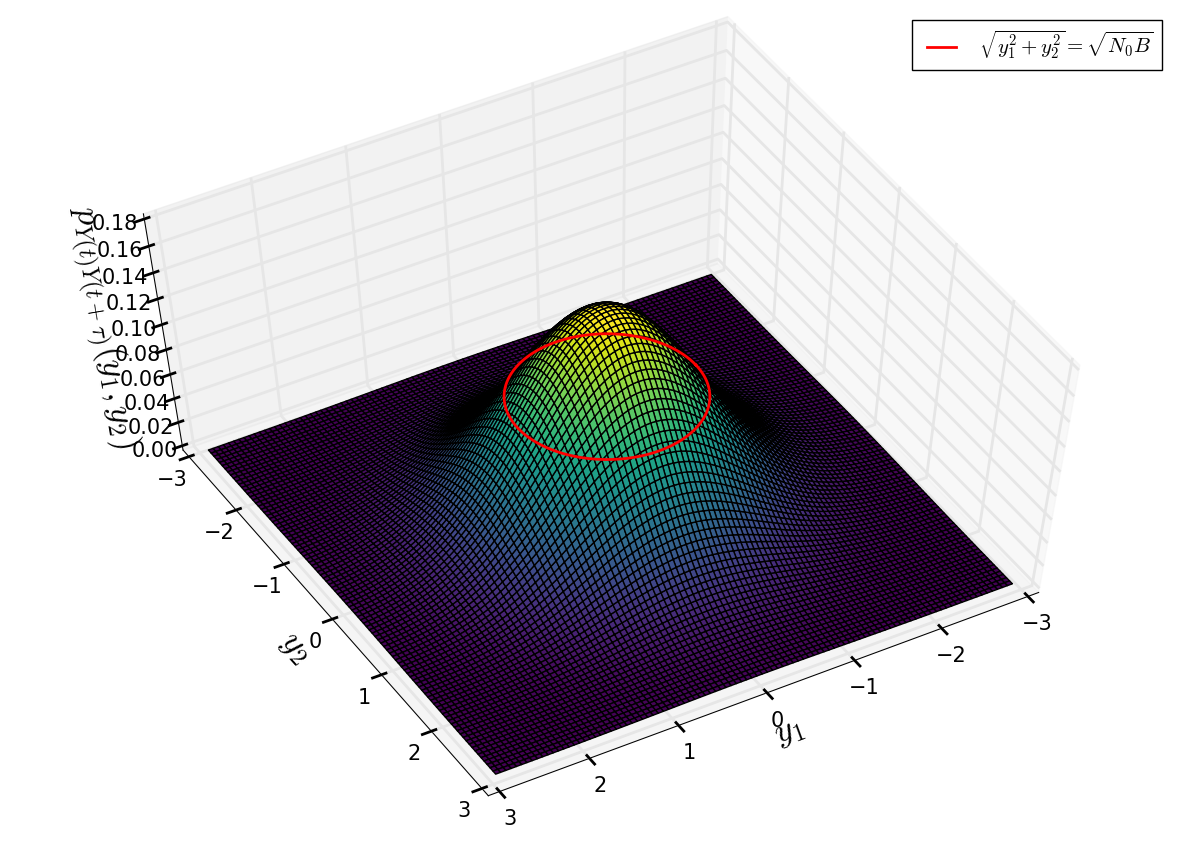

In [6]:
# Definiere Momente und Verteilungsdichtefunktion
mean_Y = np.zeros(2)
Sigma_YY = power_y*np.eye(2)
sigma_y = np.sqrt(power_y)
p_Y1_Y2 = multivariate_normal(mean=mean_Y, cov=Sigma_YY)


# Graph der Wsk-Dichte
y_ax = np.linspace(-3*sigma_y, 3*sigma_y, 1000)
y1, y2 = np.meshgrid(y_ax, y_ax)
y_vec = np.dstack((y1, y2))

fig = plt.figure(figsize=(15, 15/np.sqrt(2)))
fig.canvas.set_window_title('Verbundverteilungsdichtefunktion')
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(y1, y2, p_Y1_Y2.pdf(y_vec), cmap='viridis')
# Achsbeschriftungen
ax.grid(True)

# Ring für die Kovarianzmatrix hinzufügen:
theta = np.linspace(-pi, pi, 1000)
y1_cov, y2_cov = sigma_y*np.cos(theta), sigma_y*np.sin(theta)
y_vec_cov = np.dstack((y1_cov, y2_cov))
ax.plot(y1_cov, y2_cov, p_Y1_Y2.pdf(y_vec_cov), 'r', 
        label=r'$\sqrt{y_1^2 + y_2^2} = \sqrt{N_0 B}$')

ax.invert_xaxis()
ax.set_xlabel(r'$y_1$', fontsize=25)
ax.set_xlim((-3, 3))

ax.invert_yaxis()
ax.set_ylabel(r'$y_2$', fontsize=25)
ax.set_ylim((-3, 3))

ax.set_zlabel(r'$p_{Y(t)Y(t+\tau)}(y_1,y_2)$', fontsize=25)
ax.view_init(60, 60)

ax.tick_params(labelsize=15)
ax.legend(fontsize=15);

## Abtastung
Der Prozess werde nun mit der Abtastperiode $T= \frac{\pi}{W}$ abgetastet.

# 12.4:
Berechnen sie die Autokorrelationsfunktion **und** das Leistungsdichtespektrum des Ausgangssignals $Y(n)$.

Wenn ein zeitkontinuierlicher Zufallsprozess abgetastet wird, wird seine AKF in gleicher Weise abgetastet, da jetzt nur noch Verschiebungen um ganzzahlige Vielfache der Abtastperiodendauer eine Rolle spielen. Damit folgt:

\begin{align}
    \varphi_{YY}(\lambda) = \mathrm{E}\left[ Y(n) Y(n + \lambda) \right] = \varphi_{YY}(\lambda \ T)
            = N_0 B\ \mathrm{si}\left(W \left(\lambda \frac{\pi}{W} \right) \right)
            = N_0 B\ \gamma(\lambda)
\end{align}

Wie aus der vorhergehenden Aufgabe zu erwarten war, resultiert im Zeitdiskreten eine impulsförmige AKF.   

#### Graph der AKF $\varphi_{YY}(\lambda)$:

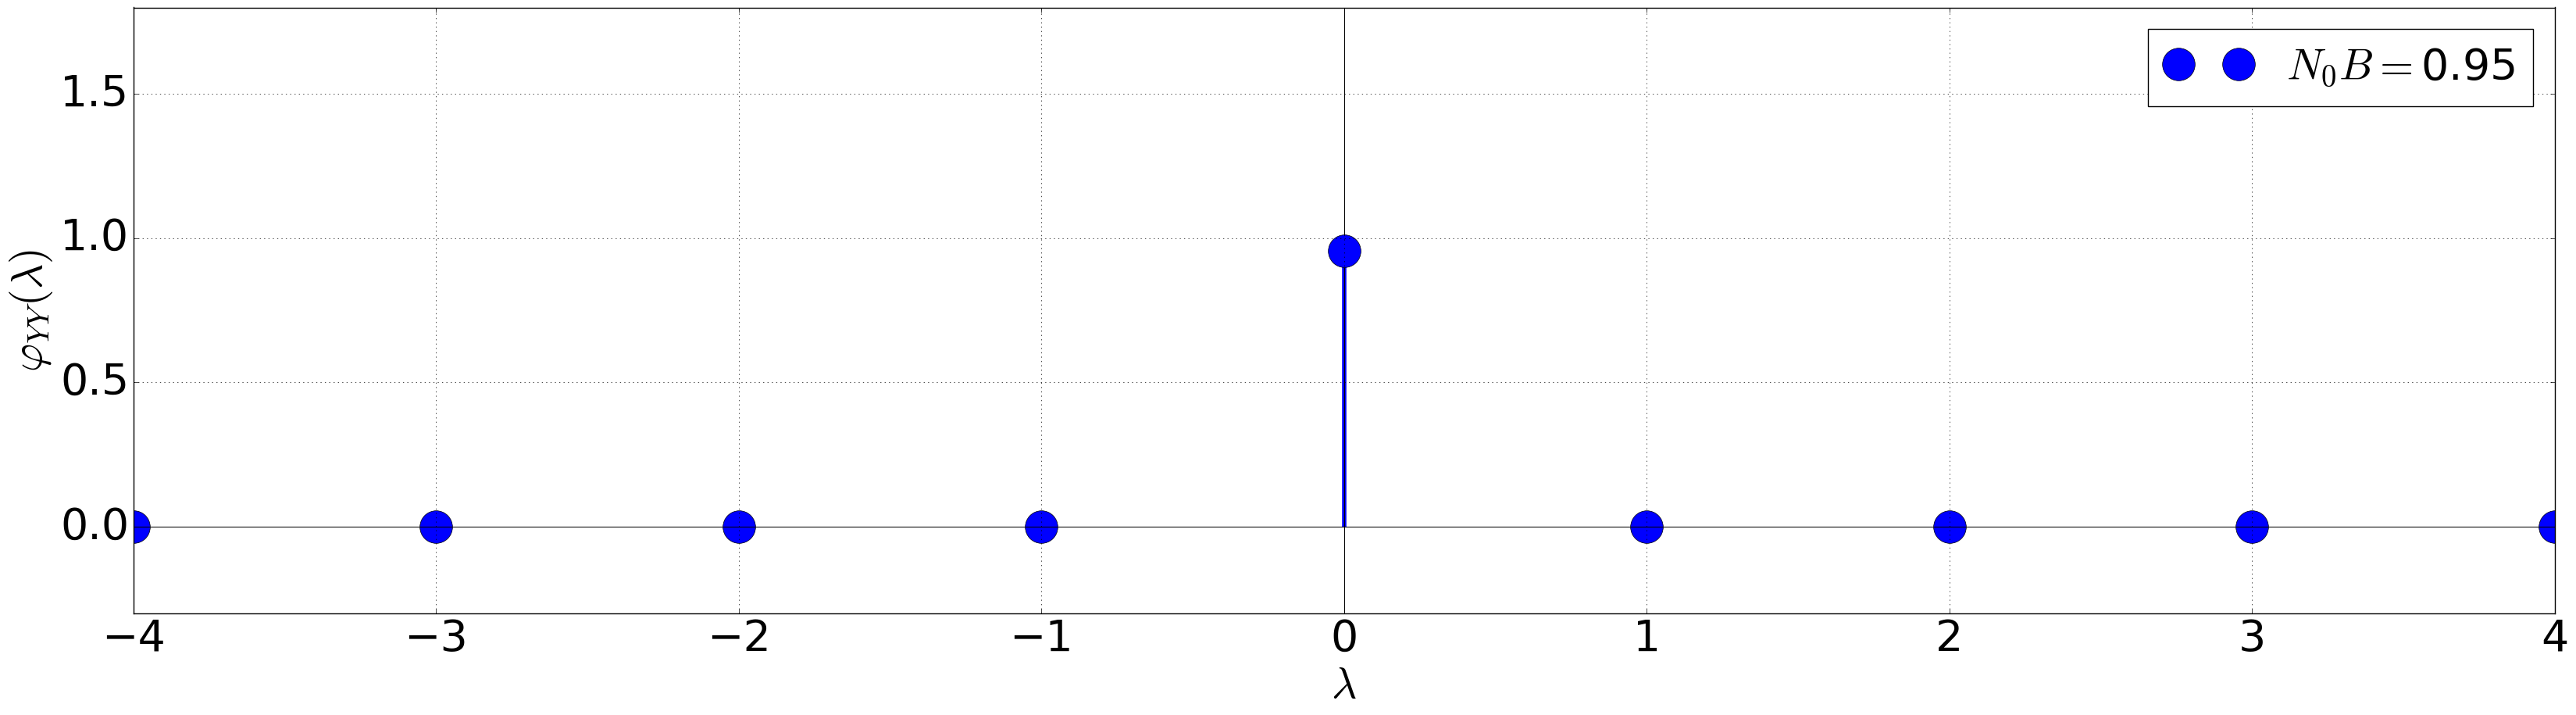

In [7]:
lambda_shift = np.arange(-4, 5)
phi_disc_yy = (lambda_shift == 0)*power_y

plt.axvline(lw=0.75, c='k')
plt.plot(lambda_shift, phi_disc_yy, 'bo', ms=30, 
          label=r'$N_0 B=$'+'{:2.2f}'.format(power_y))
plt.vlines(lambda_shift, 0, phi_disc_yy, 'b',lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\varphi_{YY}(\lambda)$')
plt.xlim((-4, 4))
plt.ylim((-0.3, 1.2*N_0/2))
plt.legend(fontsize=40)
plt.grid(True);

Das Leistungsdichtespektrum kann nun durch die Zeitdiskrete Fouriertransformation der AKF

\begin{align}
    \Phi_{YY}\left( \mathrm{e}^{j\omega T} \right) = \mathcal{F}_d\left\{ \varphi_{YY}(\lambda) \right\}
    = N_0 B\ \mathcal{F}_d\left\{ \gamma(\lambda) \right\} = N_0 B\ \underbrace{\sum_{\lambda=-\infty}^{\infty} \gamma(\lambda) \mathrm{e}^{-j\omega \lambda T}}_{=1} = N_0 B
\end{align}

oder durch die Poisson'sche Summenformel

\begin{align}
    \Phi_{YY}\left( \mathrm{e}^{j\omega T} \right) &= \frac{1}{T} \sum_{k=-\infty}^{\infty} \Phi_{YY}\left( j\left(\omega - k\frac{2 \pi}{T} \right) \right) \\
    &= \frac{N_0 W}{2\pi} \sum_{k=-\infty}^{\infty} \mathrm{rect} \left(\frac{\omega - k{\cdot} 2 W}{2 W} \right) \\
    &= \frac{N_0 W}{2\pi} = N_0 B
\end{align}

bestimmt werden.

#### Graph des Leistungsdichtespektrums $\Phi_{YY}\left( \mathrm{e}^{j\omega T} \right)$:

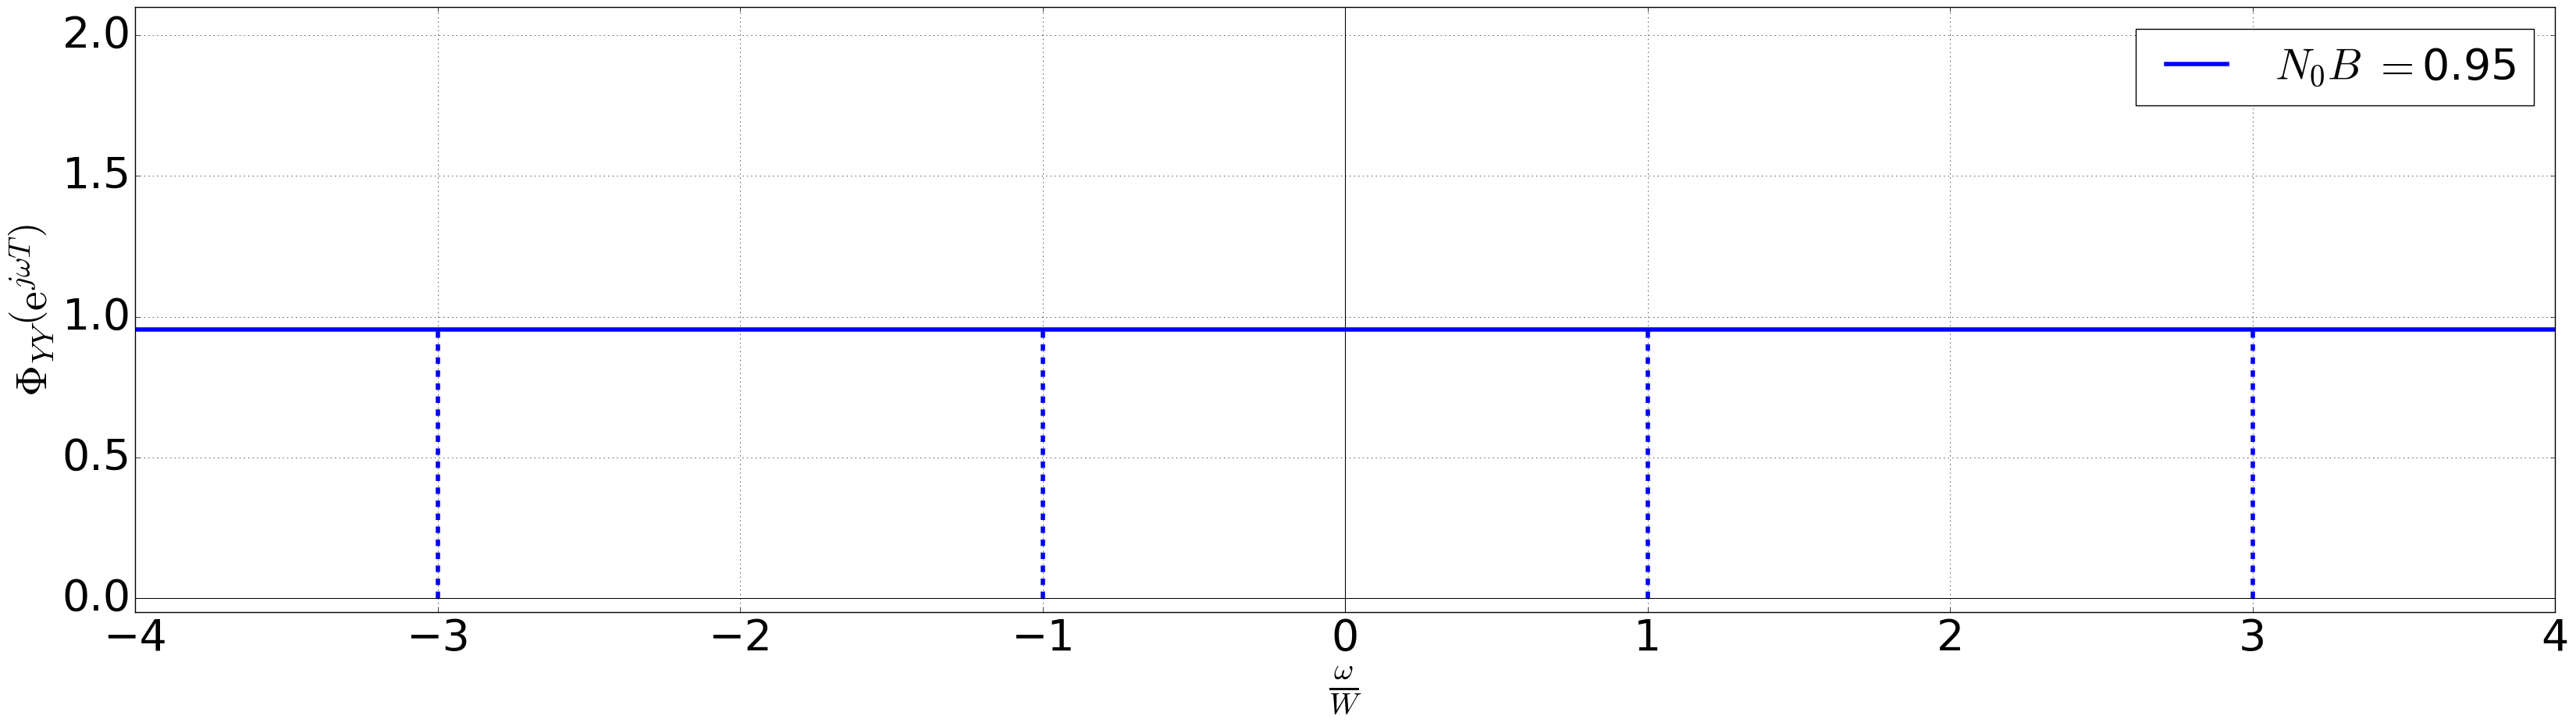

In [8]:
Phi_xx = power_y*np.ones_like(omega)

omega_bounds = np.arange(-5, 5, 2)

plt.axvline(lw=0.75, c='k')
plt.plot(omega/W, Phi_xx, lw=4, label=r'$N_0 B \ =$'+'{:2.2f}'.format(power_y))
plt.vlines(omega_bounds, 0 , power_y, 'b', 'dashed', lw=4)
plt.axhline(lw=0.75, c='k')

plt.xlabel(r'$\frac{\omega}{W}$')
plt.ylabel(r'$\Phi_{YY}\left( \mathrm{e}^{j\omega T} \right)$')
plt.xlim((-4, 4))
plt.ylim((-0.05, 1.4*N_0/2))
plt.legend(fontsize=40)
plt.grid(True);